In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
%matplotlib inline

from pprint import pprint
from zen_garden.postprocess.results import Results

### Working with results of a ZenGarden run

This notebook shows some examples on how to handle the results of a `zen-garden` run. It uses the outputs of the tests as examples. Therefore, you need to run the tests via 
```
coverage run --source="zen_garden" -m pytest -v tests/testcases/run_test.py
```
to get the data.

### Reading in the results

The results can be read in using the `Results` class. This will automatically read in all relevant files, independent of the number of scenarios or if the optimization was run with perfect or myopic foresight. However, you should know what type of input you are reading in, as the output of some routines will depend on the type.

In [22]:
# This has no scenarios and perfect foresight
res_basic = Results("../outputs/test_1a/")
# Here we have three different scenarios
res_scenario = Results("../outputs/test_6a/")
# This was run with myopic foresight
res_mf = Results("../outputs/test_4g/")
# This was run with aggregated time steps and multi year
res_ts = Results("../outputs/test_4f/")

### Accessing the config

The standard dictionaries, i.e. system, analysis, scenarios, solver and dict_sequence_time_steps can be accessed via the results dict.

In [23]:
# Show the analysis settings
pprint(res_basic.results["analysis"])

{'dataset': 'C:\\Users\\jmannhardt\\OneDrive - ETH '
            'Zurich\\Desktop\\02-ZEN\\ZEN-garden\\tests\\testcases\\test_1a',
 'discount_rate': 0.06,
 'earliest_year_of_data': 1900,
 'folder_name_system_specification': 'system_specification',
 'folder_output': 'C:\\Users\\jmannhardt\\OneDrive - ETH '
                  'Zurich\\Desktop\\02-ZEN\\ZEN-garden\\outputs',
 'header_data_inputs': {'set_capacity_types': 'capacity_type',
                        'set_carriers': 'carrier',
                        'set_conditioning_carrier_parents': 'carrier',
                        'set_conditioning_carriers': 'carrier',
                        'set_conversion_technologies': 'technology',
                        'set_dependent_carriers': 'carrier',
                        'set_edges': 'edge',
                        'set_elements': 'element',
                        'set_existing_technologies': 'existing_technology',
                        'set_input_carriers': 'carrier',
                   

### Comparing the configs, parameters and variables of two result files

You can compare two result objects by using the `compare_configs`, `compare_model_parameters` and `compare_model_variables` classmethods. This can help you to get a fast overview of where two datasets are different and where the reasons for errors lie.

In [24]:
# difference between configs
diff_config = Results.compare_configs([res_basic,res_ts])
diff_config

Comparing the configs of ['test_1a', 'test_4f']


{'analysis': {'dataset': {'test_1a': 'C:\\Users\\jmannhardt\\OneDrive - ETH Zurich\\Desktop\\02-ZEN\\ZEN-garden\\tests\\testcases\\test_1a',
   'test_4f': 'C:\\Users\\jmannhardt\\OneDrive - ETH Zurich\\Desktop\\02-ZEN\\ZEN-garden\\tests\\testcases\\test_4f'}},
 'system': {'aggregated_time_steps_per_year': {'test_1a': 1, 'test_4f': 10},
  'conduct_time_series_aggregation': {'test_1a': False, 'test_4f': True},
  'unaggregated_time_steps_per_year': {'test_1a': 1, 'test_4f': 8760},
  'optimized_years': {'test_1a': 1, 'test_4f': 3}}}

In [25]:
# difference between model params
# for larger models, this can take several minutes
diff_params = Results.compare_model_parameters([res_ts,res_mf])
diff_params

Comparing the model parameters of ['test_4f', 'test_4g']


Compare parameter availability_carrier_import:   7%|▋         | 3/41 [00:00<00:00, 71.09it/s]       

Component availability_carrier_import does not have matching index or columns
Parameter availability_carrier_import has different values


Compare parameter capacity_limit_technology:  12%|█▏        | 5/41 [00:00<00:00, 52.87it/s]         

Component capacity_limit_technology does not have matching index or columns
Parameter capacity_limit_technology has different values


Compare parameter max_built_capacity:  76%|███████▌  | 31/41 [00:00<00:00, 62.65it/s]          

Component max_built_capacity does not have matching index or columns
Parameter max_built_capacity has different values


Compare parameter time_steps_operation_duration:  98%|█████████▊| 40/41 [00:00<00:00, 64.17it/s]

Parameter time_steps_operation_duration has different values


Compare parameter time_steps_storage_level_duration: 100%|██████████| 41/41 [00:00<00:00, 57.40it/s]


{'availability_carrier_import':                  test_4f test_4g test_4f test_4g test_4f test_4g
                        0       0       1       1       2       2
 carrier     node                                                
 heat        CH       0.0     0.0     0.0     0.0     0.0     0.0
             DE       0.0     0.0     0.0     0.0     0.0     0.0
 natural_gas CH       0.0     NaN     0.0     NaN     0.0     NaN
             DE       0.0     NaN     0.0     NaN     0.0     NaN,
 'capacity_limit_technology':                                    test_4f                
 location                                CH CH-DE  DE DE-CH
 technology           capacity_type                        
 natural_gas_boiler   power             NaN   NaN NaN   NaN
 natural_gas_pipeline power             NaN   NaN NaN   NaN
 natural_gas_storage  energy            NaN   NaN NaN   NaN
                      power             NaN   NaN NaN   NaN,
 'max_built_capacity':                      test_4f test

In [26]:
# you can also compare the model variable values. However, even a small change in the input data might have a significant impact on the results, which then leads to large differences in the variable values
diff_var = Results.compare_model_variables([res_scenario,res_scenario],scenarios=("scenario_2","scenario_4"))
diff_var

Comparing the model variables of ['test_6a', 'test_6a']


Compare variable NPV:   3%|▎         | 1/37 [00:00<?, ?it/s]

Variable NPV has different values


Compare variable built_capacity:   5%|▌         | 2/37 [00:00<00:00, 63.26it/s]

Variable built_capacity has different values


Compare variable capacity:   8%|▊         | 3/37 [00:00<00:00, 35.73it/s]      

Variable capacity has different values


Compare variable capacity_approximation:  11%|█         | 4/37 [00:00<00:01, 29.42it/s]

Variable capacity_approximation has different values


Compare variable capex:  14%|█▎        | 5/37 [00:00<00:01, 29.42it/s]                 

Variable capex has different values


Compare variable capex_approximation:  16%|█▌        | 6/37 [00:00<00:01, 29.42it/s]

Variable capex_approximation has different values


Compare variable capex_total:  19%|█▉        | 7/37 [00:00<00:01, 24.70it/s]        

Variable capex_total has different values


Compare variable capex_yearly:  22%|██▏       | 8/37 [00:00<00:01, 24.70it/s]

Variable capex_yearly has different values


Compare variable carbon_emissions_carrier:  24%|██▍       | 9/37 [00:00<00:01, 24.70it/s]

Variable carbon_emissions_carrier has different values


Compare variable carbon_emissions_carrier_total:  27%|██▋       | 10/37 [00:00<00:01, 24.11it/s]

Variable carbon_emissions_carrier_total has different values


Compare variable carbon_emissions_cumulative:  30%|██▉       | 11/37 [00:00<00:01, 24.11it/s]   

Variable carbon_emissions_cumulative has different values


Compare variable carbon_emissions_total:  41%|████      | 15/37 [00:00<00:00, 27.26it/s]           

Variable carbon_emissions_total has different values


Compare variable cost_carrier:  57%|█████▋    | 21/37 [00:00<00:00, 24.94it/s]               

Variable cost_carrier has different values


Compare variable cost_carrier_total:  59%|█████▉    | 22/37 [00:00<00:00, 24.94it/s]

Variable cost_carrier_total has different values


Compare variable cost_total:  65%|██████▍   | 24/37 [00:00<00:00, 25.67it/s]              

Variable cost_total has different values


Compare variable dependent_flow_approximation:  68%|██████▊   | 25/37 [00:00<00:00, 25.67it/s]

Variable dependent_flow_approximation has different values


Compare variable import_carrier_flow:  73%|███████▎  | 27/37 [00:01<00:00, 24.69it/s]         

Variable import_carrier_flow has different values


Compare variable input_flow:  76%|███████▌  | 28/37 [00:01<00:00, 24.69it/s]         

Variable input_flow has different values


Compare variable invested_capacity:  81%|████████  | 30/37 [00:01<00:00, 22.71it/s] 

Variable invested_capacity has different values


Compare variable opex_total:  89%|████████▉ | 33/37 [00:01<00:00, 22.04it/s]       

Variable opex_total has different values


Compare variable opex_yearly:  92%|█████████▏| 34/37 [00:01<00:00, 22.04it/s]

Variable opex_yearly has different values


Compare variable output_flow:  95%|█████████▍| 35/37 [00:01<00:00, 22.04it/s]

Variable output_flow has different values


Compare variable reference_flow_approximation:  97%|█████████▋| 36/37 [00:01<00:00, 22.51it/s]

Variable reference_flow_approximation has different values


Compare variable shed_demand_carrier: 100%|██████████| 37/37 [00:01<00:00, 23.24it/s]         


{'NPV':        test_6a    test_6a
 year                     
 0     9.843441  10.533404
 1     9.286265  10.865800,
 'built_capacity':                                           test_6a                  
 year                                            0      0    1     1
 technology         capacity_type location                          
 natural_gas_boiler power         CH          20.0   18.0  0.0   2.0
                                  DE         100.0  110.0  0.0  10.0,
 'capacity':                                           test_6a                     
 year                                            0      0      1      1
 technology         capacity_type location                             
 natural_gas_boiler power         CH          20.0   18.0   20.0   20.0
                                  DE         100.0  110.0  100.0  120.0,
 'capacity_approximation':                         test_6a                  
 year                          0      0    1     1
 technology        

### Extracting individual data frames
There are three main methods to extract component (parameter and variable) values: `get_total`, `get_full_ts`, and `get_df`. It does not matter if the component is a parameter or a variable.

You can get the total value of a component for each year by using `get_total`. The full time series of a component is returned by `get_full_ts`. This reverts the time series aggregation and disaggregates the data. If the selected component is indexed by the years (e.g., `capex` or `capacity`), then the returned data is the same as from `get_total`. If you specify a `year`, only the values for this year are returned. You can select a specific `element_name`, which corresponds to the first level of the index, i.e., generally a technology or a carrier.

You can either feed `get_total` and `get_full_ts` a dataframe as returned by `get_df` or specify the component name as a string

You can access individual data frames from any component with the `get_df` method. However, the behavior differs slightly for the usecases.
If the optimization was run with perfect foresight and no scenarios, then the data frame is returned as `pandas.Series`. For myopic foresight, the final dataframe is stiched together from the relevant outputs if the component is set yearly. If multiple scenarios were run, a dictionary containing the data frame for all different scenarios is returned. However, you can specify the scenario in advance, then only a single data frame is returned.

Additionally, the method provides a shortcut to save the extracted dataframe directly to a CSV, or in case of different scenarios to a bundle of CSV files.

In [27]:
# This will return a single data frame
df = res_ts.get_df('import_carrier_flow')
df

carrier      node  time_operation
natural_gas  CH    0                 17.228111
                   1                 17.228111
                   2                 17.228111
                   3                  3.989961
                   4                  3.989961
                                       ...    
heat         DE    25                 0.000000
                   26                 0.000000
                   27                 0.000000
                   28                 0.000000
                   29                 0.000000
Name: import_carrier_flow, Length: 120, dtype: float64

In [28]:
# We can calculate the total value of the dataframe
res_ts.get_total(df)

0              1              2
carrier     node                                             
heat        CH         0.000000       0.000000       0.000000
            DE         0.000000       0.000000       0.000000
natural_gas CH    110402.790806  110402.790806  110402.790806
            DE    646063.984500  646063.984500  646063.984500

In [29]:
# We can also only specify the name
res_ts.get_total("import_carrier_flow")

0              1              2
carrier     node                                             
heat        CH         0.000000       0.000000       0.000000
            DE         0.000000       0.000000       0.000000
natural_gas CH    110402.790806  110402.790806  110402.790806
            DE    646063.984500  646063.984500  646063.984500

In [30]:
# and also get the full timeseries if we want
df_full_ts = res_ts.get_full_ts("import_carrier_flow")
df_full_ts

0           1           2           3           4      \
carrier     node                                                               
heat        CH      0.000000    0.000000    0.000000    0.000000    0.000000   
            DE      0.000000    0.000000    0.000000    0.000000    0.000000   
natural_gas CH     21.415309   21.415309   21.415309   24.988181   32.309980   
            DE    117.181036  117.181036  117.181036  136.913735  186.758318   

                       5           6           7           8           9      \
carrier     node                                                               
heat        CH      0.000000    0.000000    0.000000    0.000000    0.000000   
            DE      0.000000    0.000000    0.000000    0.000000    0.000000   
natural_gas CH     32.309980   32.309980   32.309980   32.309980   32.309980   
            DE    186.758318  186.758318  186.758318  186.758318  186.758318   

                  ...       26270       26271       26272       26273  \
carrier     node  ...                                                   
heat        CH    ...    0.000000    0.000000    0.000000    0.000000   
            DE    ...    0.000000    0.000000    0.000000    0.000000   
natural_gas CH    ...   32.309980   32.309980   32.309980   32.309980   
            DE    ...  186.758318  186.758318  186.758318  186.758318   

                       26274       26275       26276       26277       26278  \
carrier     node                                                               
heat        CH      0.000000    0.000000    0.000000    0.000000    0.000000   
            DE      0.000000    0.000000    0.000000    0.000000    0.000000   
natural_gas CH     32.309980   32.309980   32.309980   28.491928   21.415309   
            DE    186.758318  186.758318  186.758318  159.877970  117.181036   

                       26279  
carrier     node              
heat        CH      0.000000  
            DE      0.000000  
natural_gas CH     21.415309  
            DE    117.181036  

[4 rows x 26280 columns]

In [31]:
# you can also save the dataframe directly to a csv:
df = res_basic.get_df('carbon_emissions_overshoot', to_csv="test")
# this prints out the content of the generated csv
!cat test.csv

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [32]:
# if we have multiple scenarios, all dataframe will be returned in a dict
df_dict = res_scenario.get_df('export_carrier_flow')
pprint(df_dict)

{'scenario_': carrier      node  time_operation
natural_gas  CH    0                 0.0
                   1                 0.0
                   2                 0.0
                   3                 0.0
             DE    0                 0.0
                   1                 0.0
                   2                 0.0
                   3                 0.0
heat         CH    0                 0.0
                   1                 0.0
                   2                 0.0
                   3                 0.0
             DE    0                 0.0
                   1                 0.0
                   2                 0.0
                   3                 0.0
Name: export_carrier_flow, dtype: float64,
 'scenario_1': carrier      node  time_operation
natural_gas  CH    0                 0.0
                   1                 0.0
                   2                 0.0
                   3                 0.0
             DE    0                 0.0

In [33]:
# saving this to a csv will create a file for each scenario
df_dict = res_scenario.get_df('export_carrier_flow', to_csv="test2")
# list files and print content of one
!echo "Generated files: "
!ls test2*
!echo
!echo "Output of test2_scenario_2.csv"
!cat test2_scenario_2.csv

"Generated files: "


'ls' is not recognized as an internal or external command,
operable program or batch file.


ECHO is on.
"Output of test2_scenario_2.csv"


'cat' is not recognized as an internal or external command,
operable program or batch file.


In [36]:
# we can also specify a specific scneario
df = res_scenario.get_df('import_carrier_flow', scenario="scenario_2")
df

carrier      node  time_operation
natural_gas  CH    0                  11.0
                   1                  11.0
                   2                  22.0
                   3                  22.0
             DE    0                 110.0
                   1                 110.0
                   2                  99.0
                   3                  99.0
heat         CH    0                   0.0
                   1                   0.0
                   2                   0.0
                   3                   0.0
             DE    0                   0.0
                   1                   0.0
                   2                   0.0
                   3                   0.0
Name: import_carrier_flow, dtype: float64

In [37]:
# This will collect the values from the results folders of the different myopic foresight runs
df = res_mf.get_df("carbon_emissions_cumulative")
df

year
0    151.293355
1    302.586710
2    453.880065
Name: carbon_emissions_cumulative, dtype: float64

If you enable the calculation of dual variables (e.g, the marginal cost of production of a carrier as the shadow price of the energy balance) in the config with `solver["add_duals"] = True`, you can use `get_dual` to extract the dual variables. Otherwise, it is skipped. `get_dual` uses `get_full_ts`, thus always returns the full disaggregated time series. You must pass the name of the constraint.

In [38]:
res_mf.get_dual("constraint_nodal_energy_balance")

Duals are not calculated. Skip.


### How to plot your results

The ```Results``` class offers three different plotting functions explained at https://github.com/RRE-ETH/ZEN-garden/discussions/251

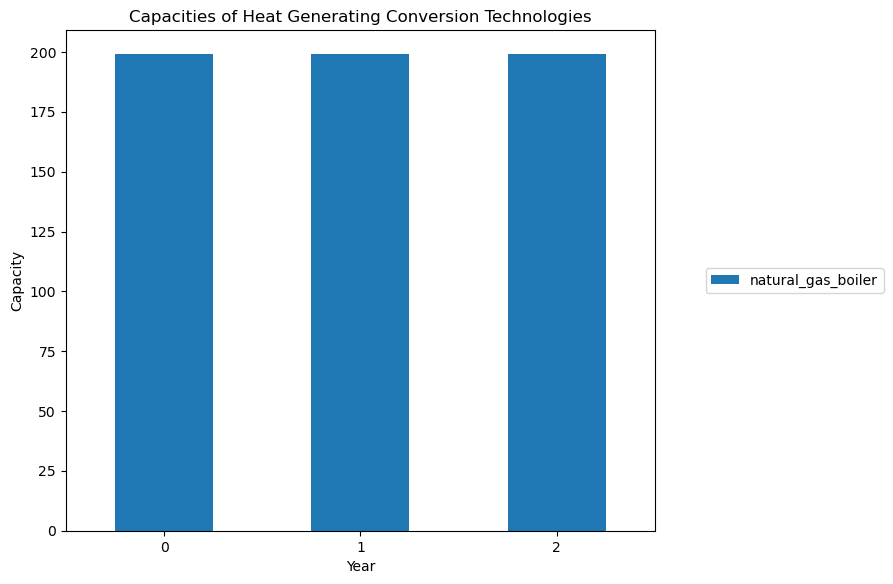

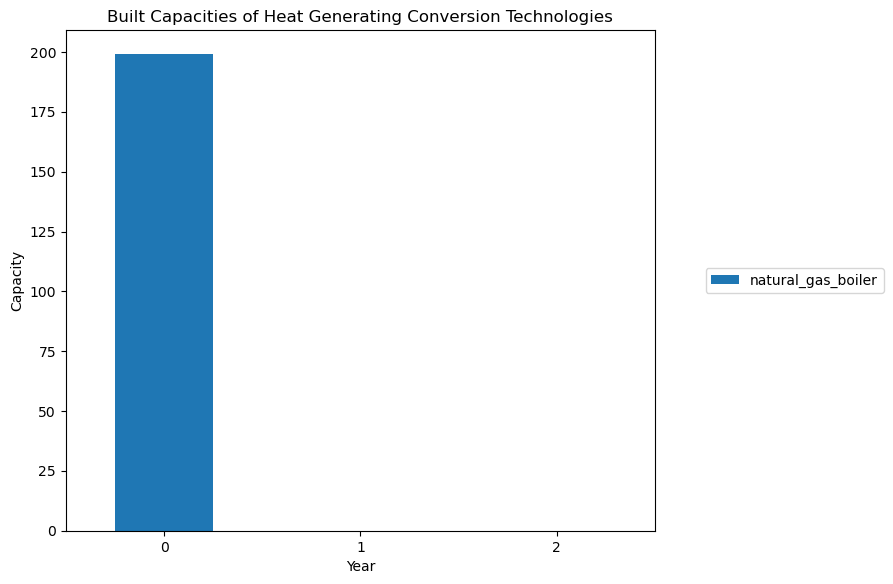

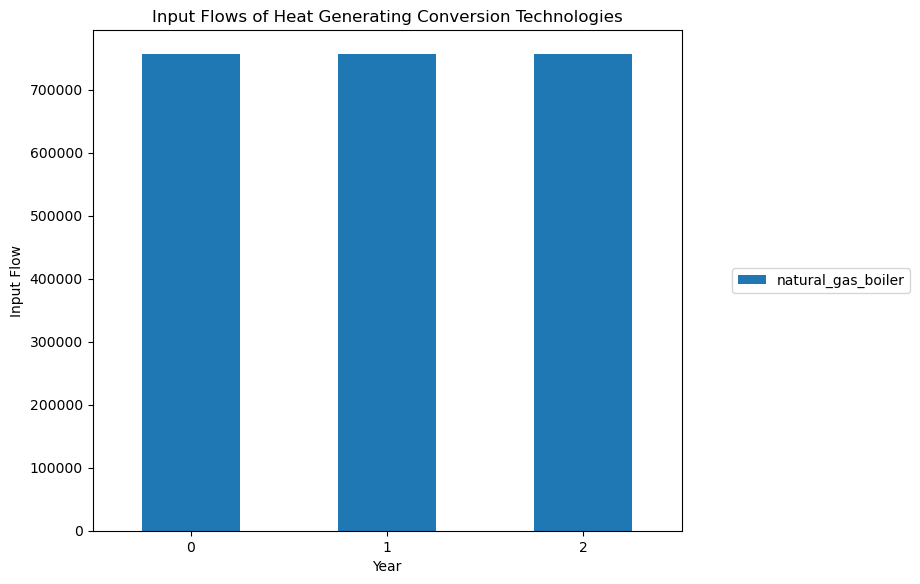

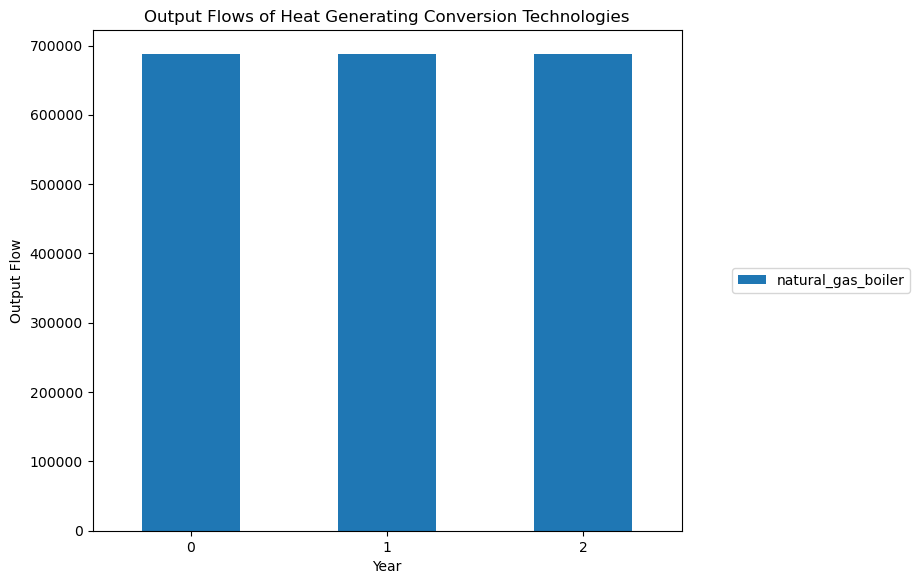

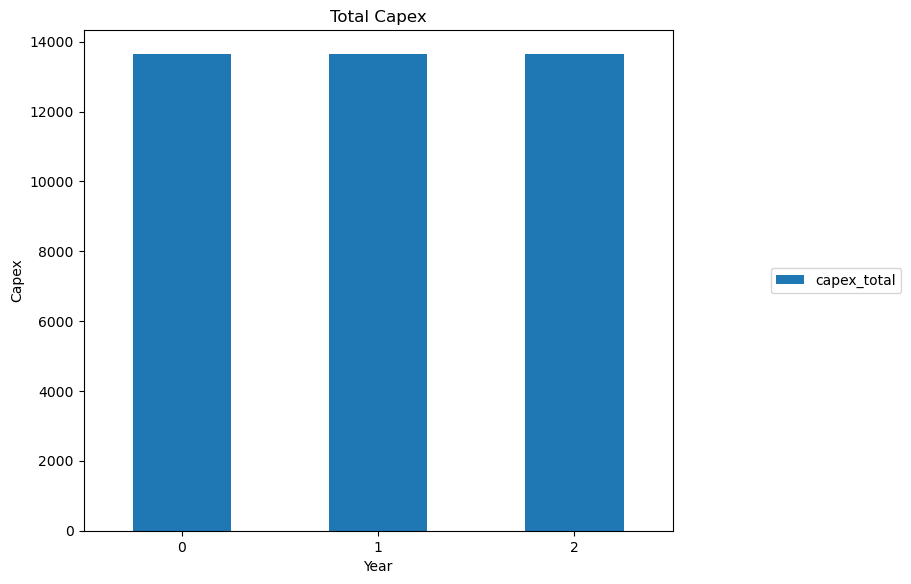

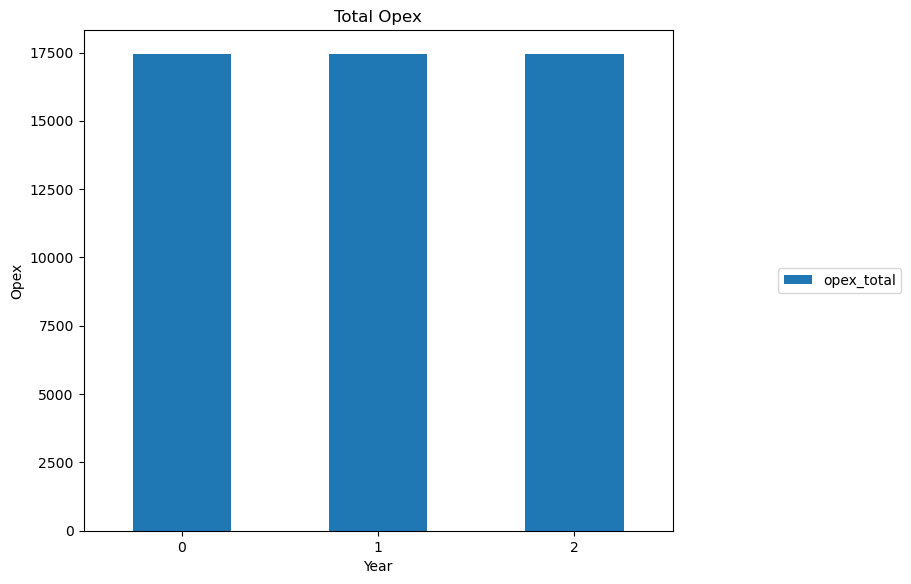

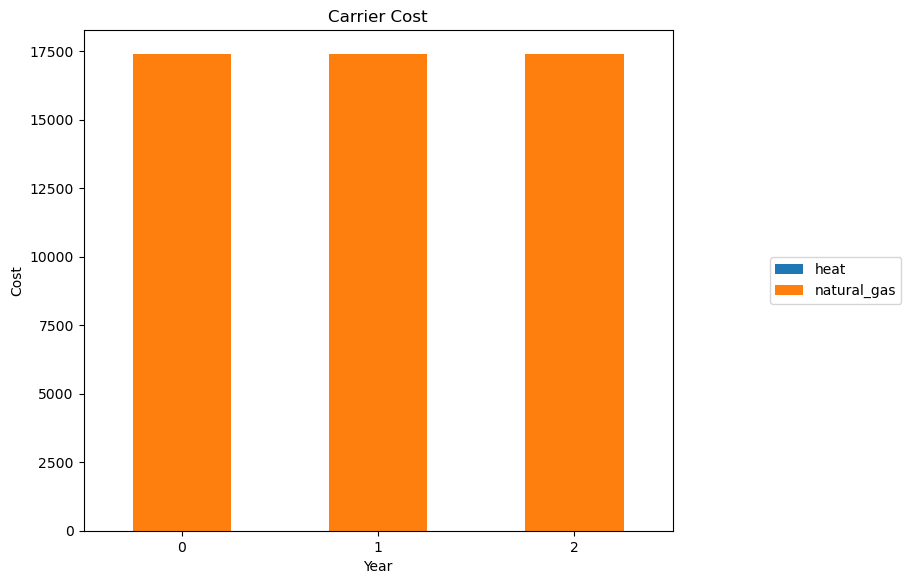

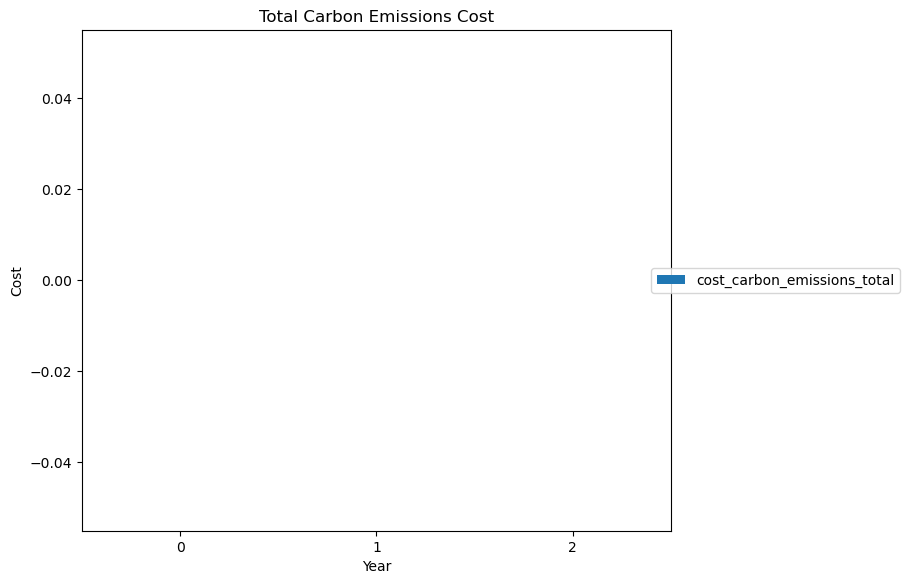

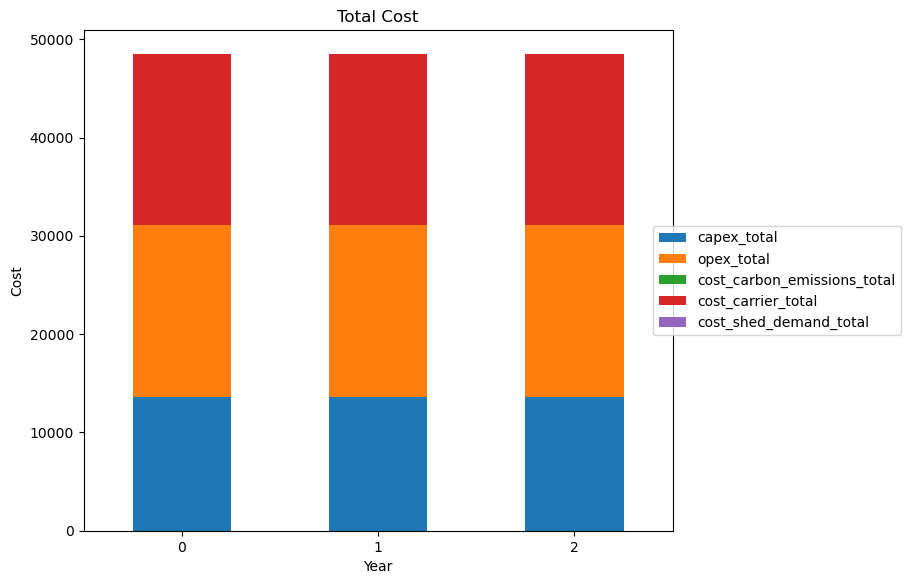

In [39]:
#Create the standard plots of your Results object (e.g. res_ts)
res_ts.standard_plots()

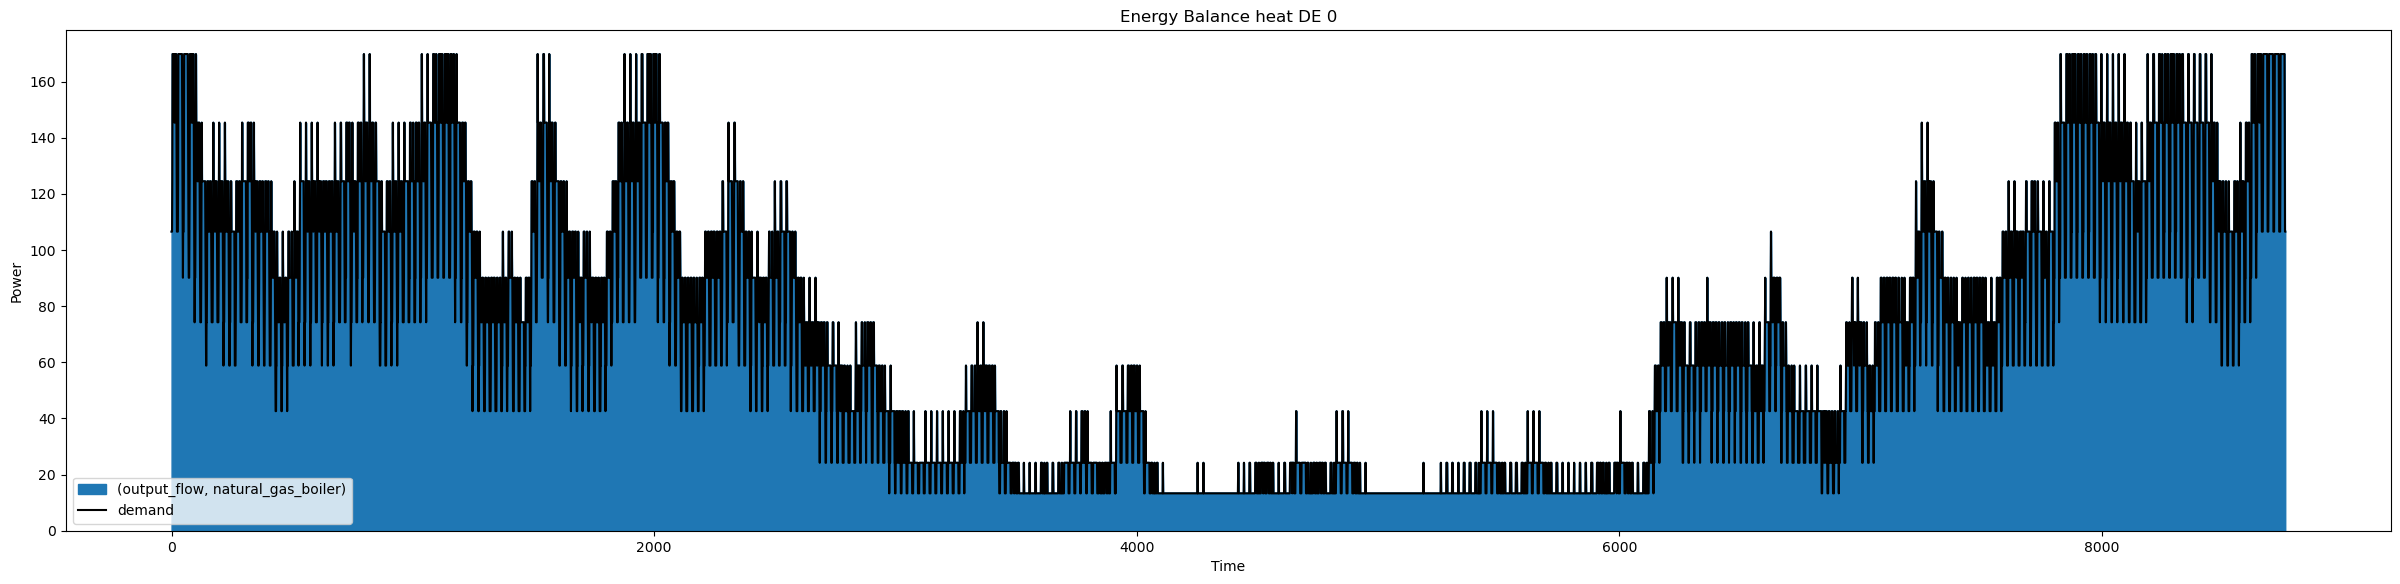

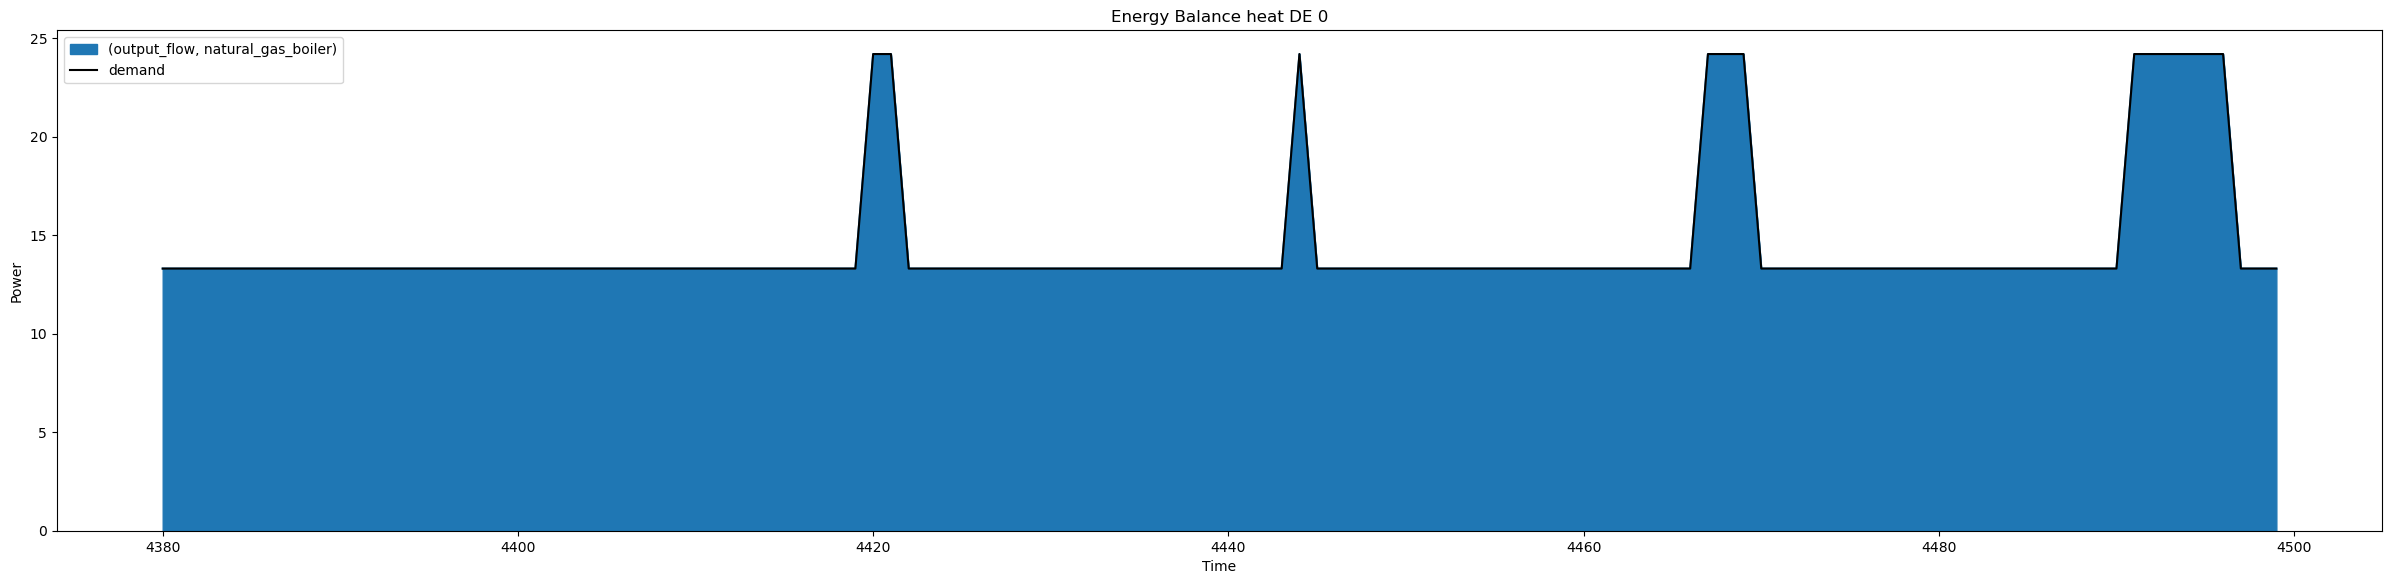

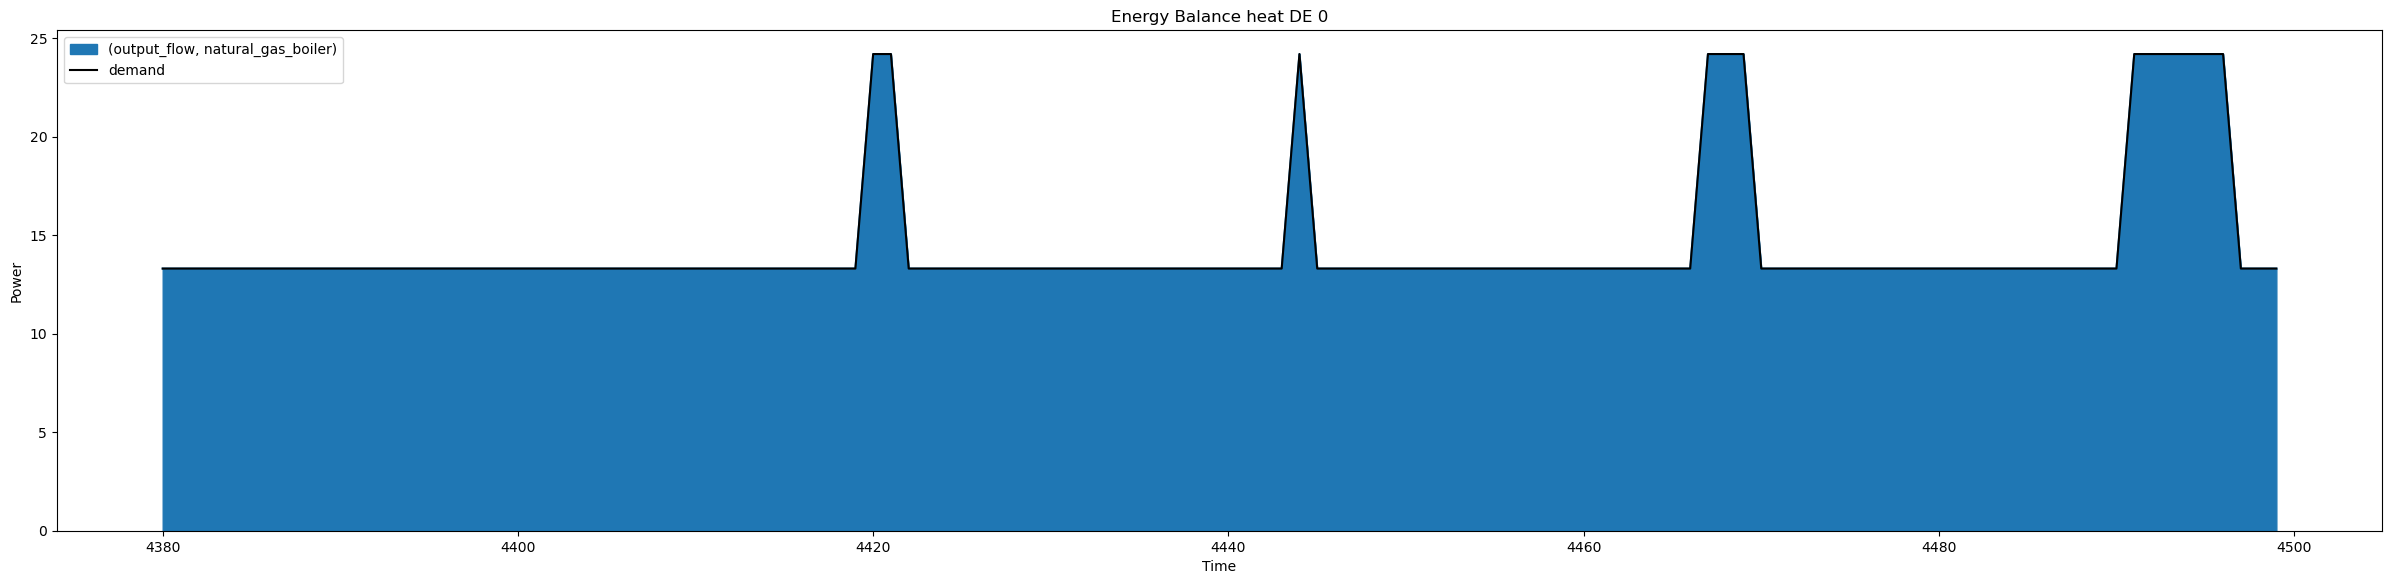

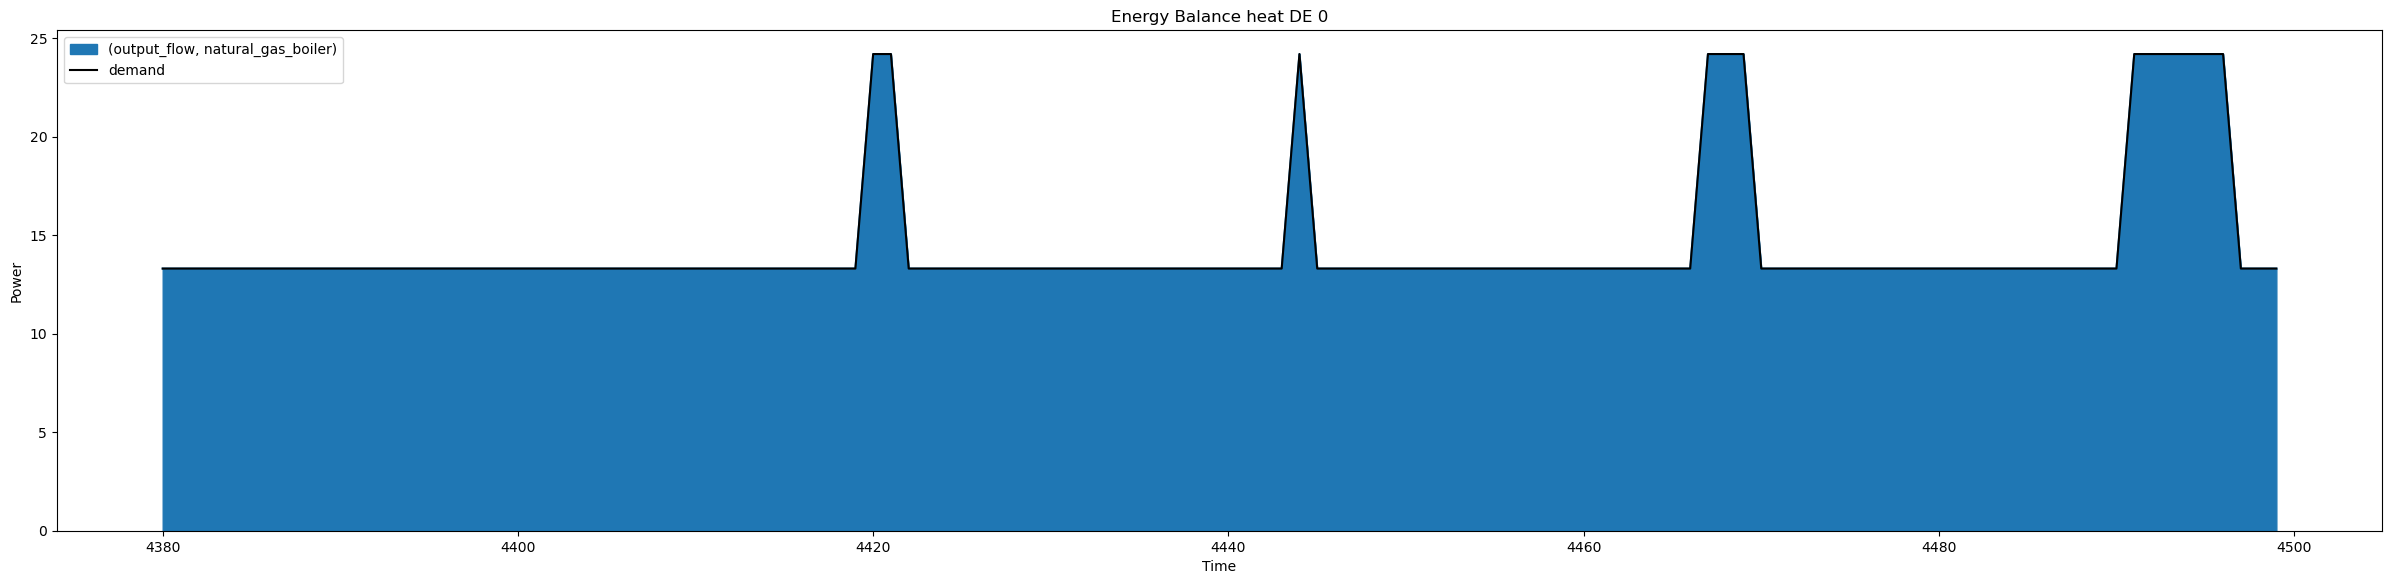

In [40]:
#Visualise the energy balance at the node Germany for the carrier heat in year 0
res_ts.plot_energy_balance("DE","heat",0)
#create a zoom-in
res_ts.plot_energy_balance("DE", "heat", 0, start_hour=int(8760/2), duration=5*24)
#save your figure as a pdf(works identically for all three plot functions)(figure is shown anyway)
res_ts.plot_energy_balance("DE", "heat", 0, start_hour=int(8760/2), duration=5*24, save_fig=True)
#save your figure in another format
res_ts.plot_energy_balance("DE", "heat", 0, start_hour=int(8760/2), duration=5*24, save_fig=True, file_type="png")

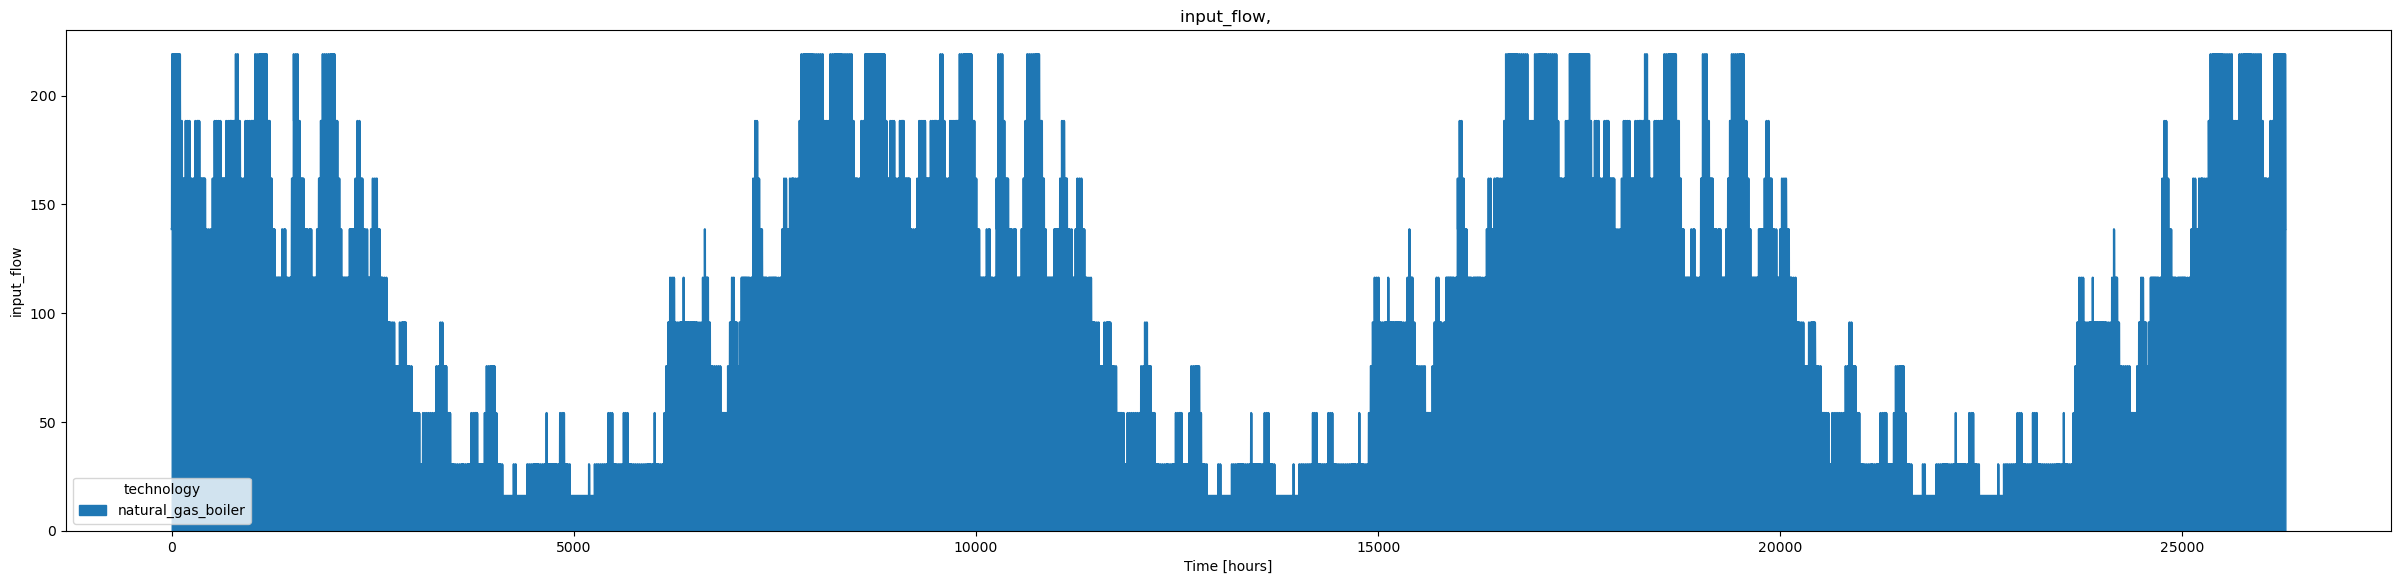

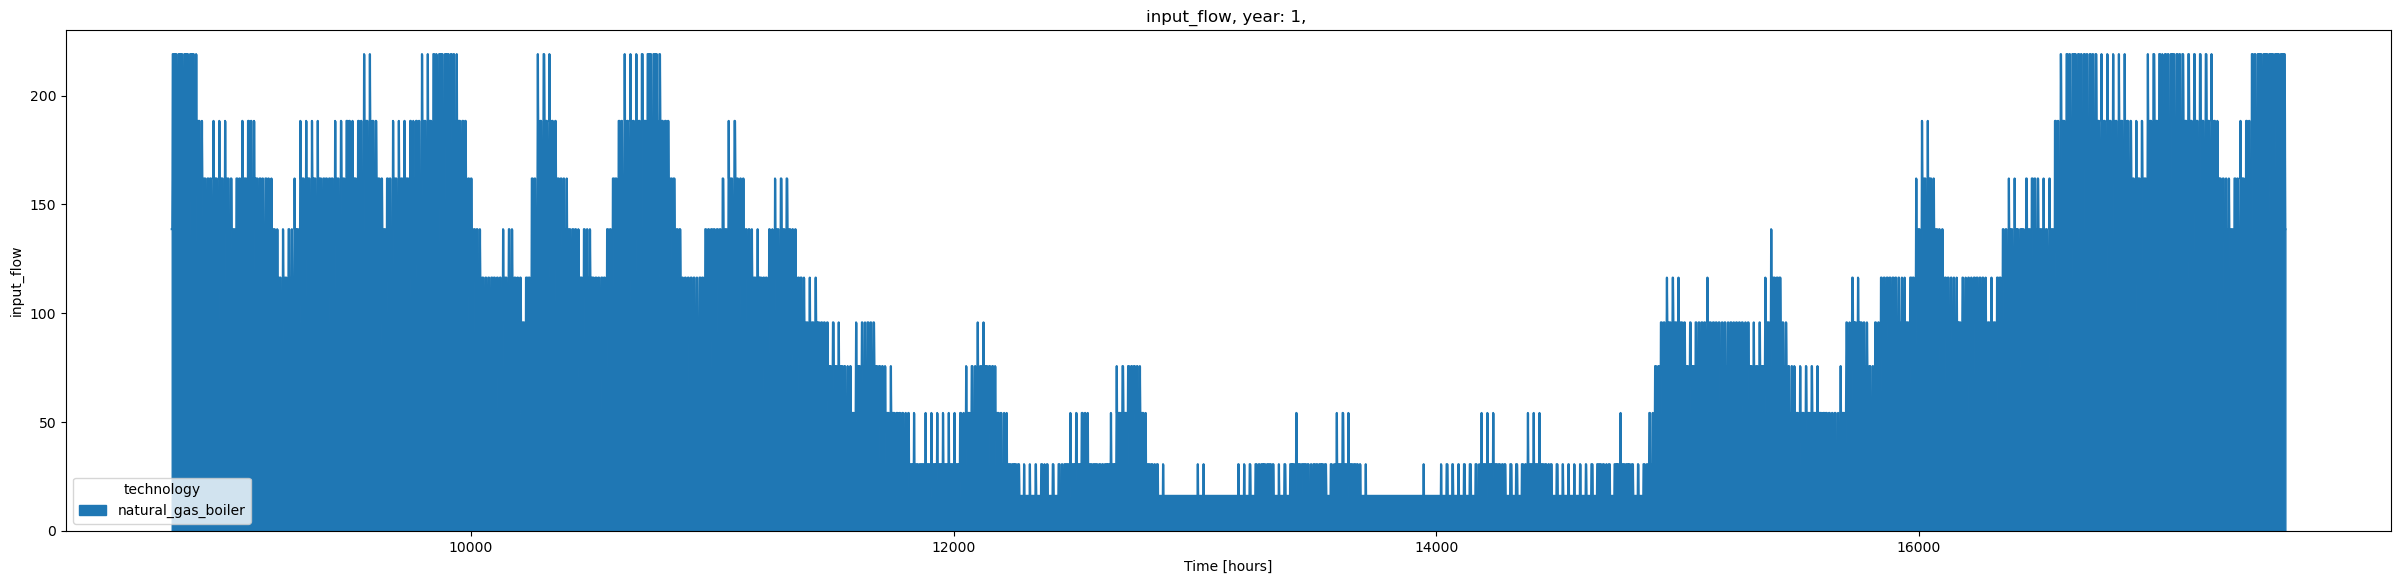

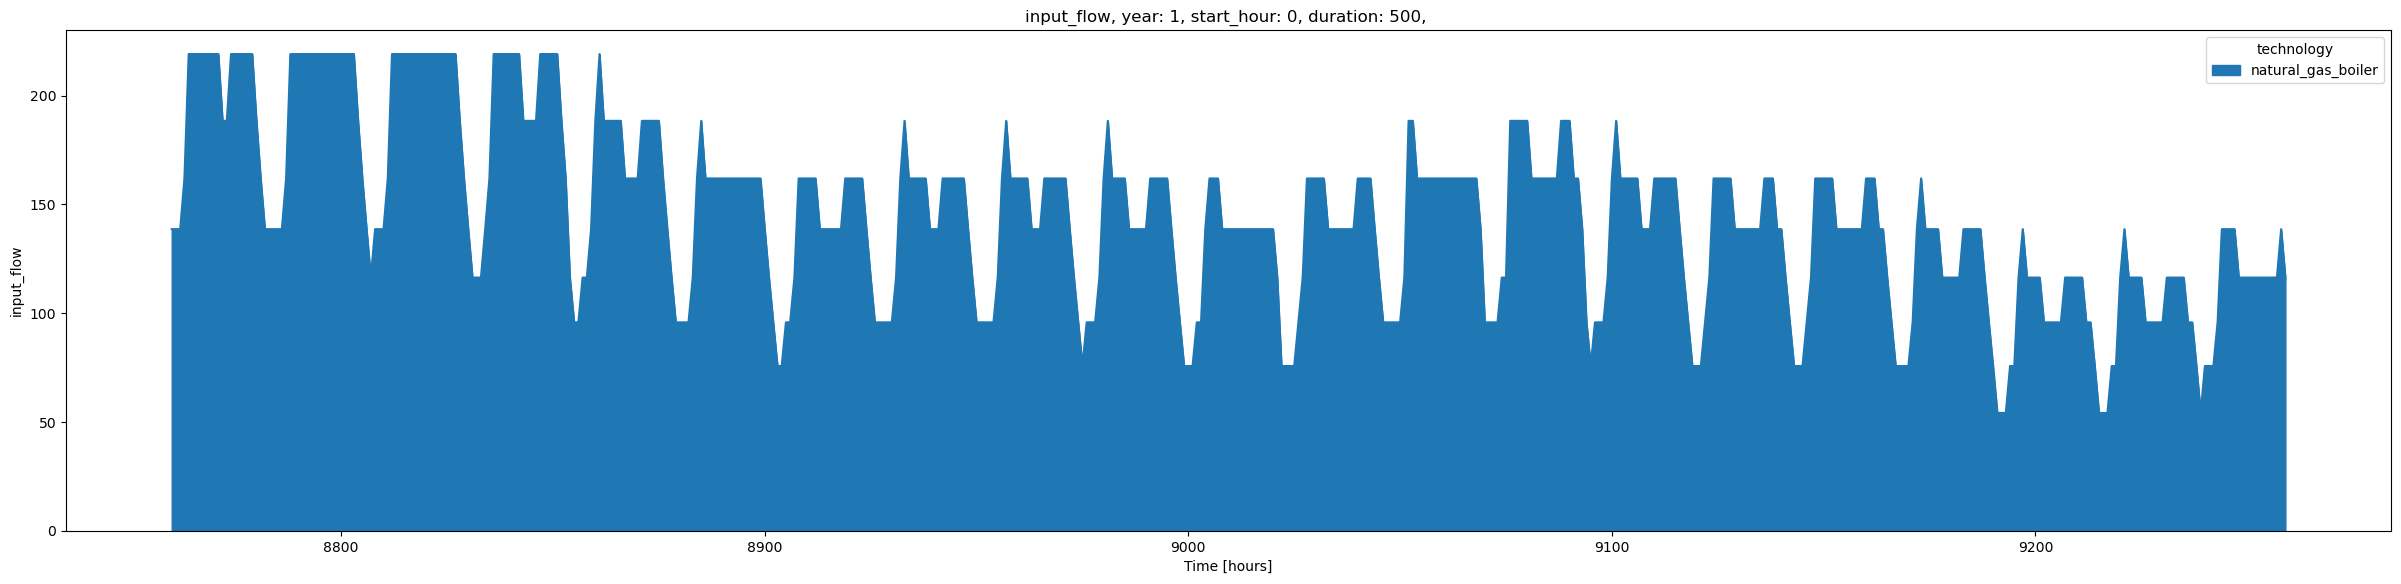

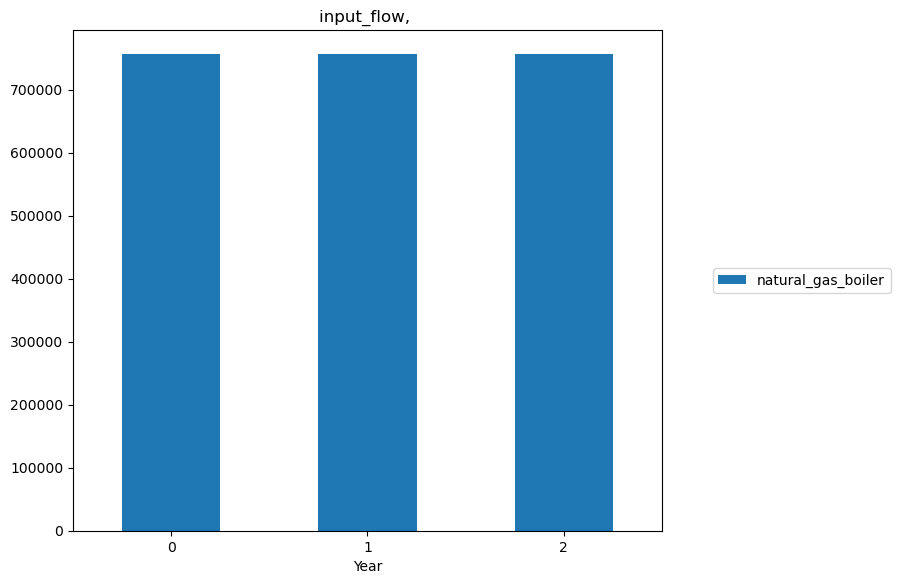

In [41]:
#Create more customized plots:
res_ts.plot("input_flow")
#time adjustments
#plot only second year
res_ts.plot("input_flow", year=1)
#create zoom-in
res_ts.plot("input_flow", year=1, start_hour=0, duration=500)
#use yearly time steps
res_ts.plot("input_flow", yearly=True)

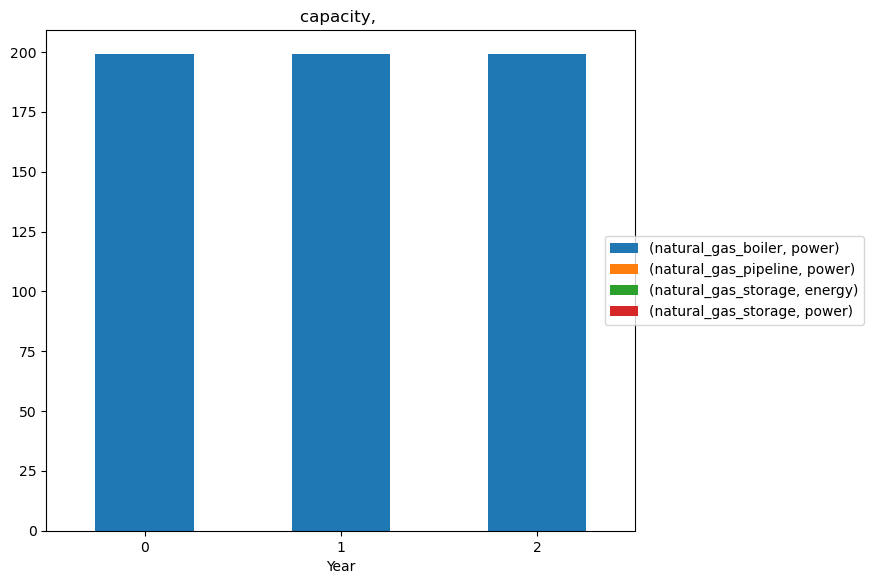

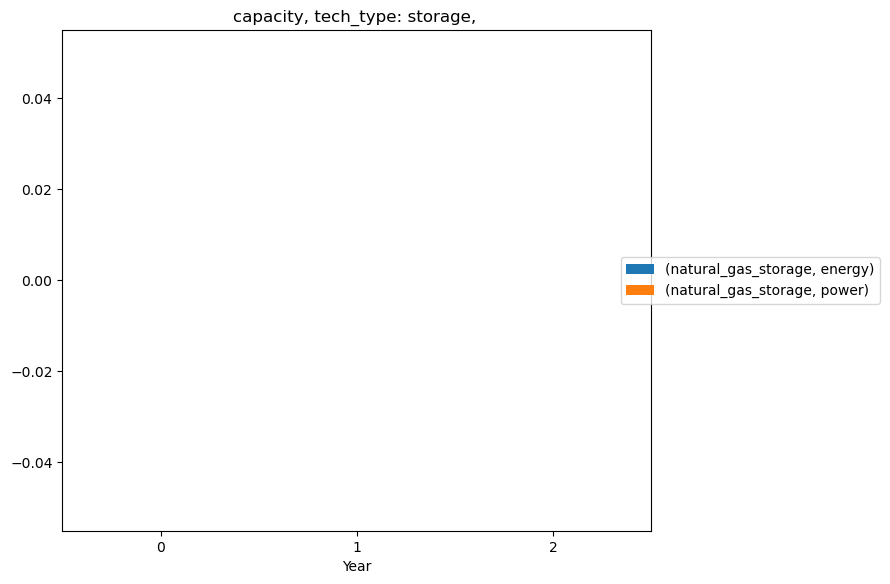

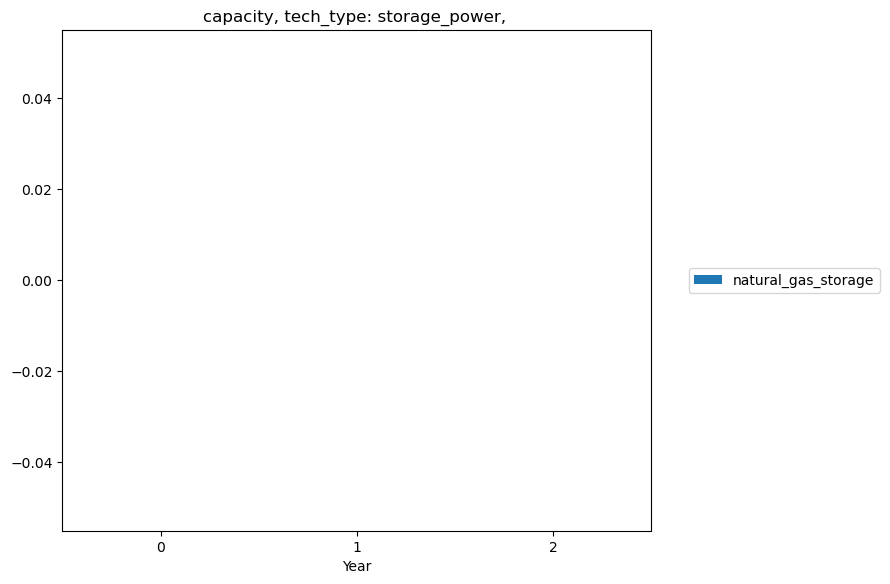

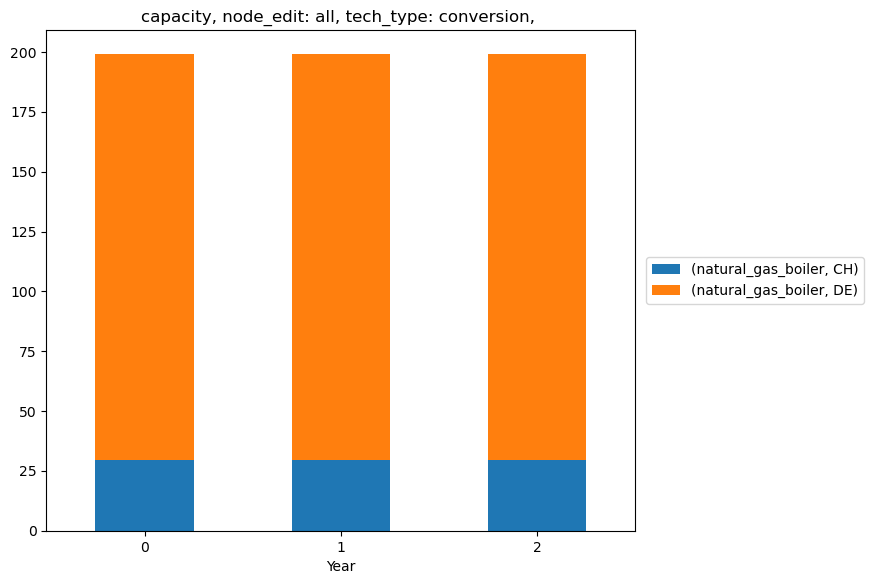

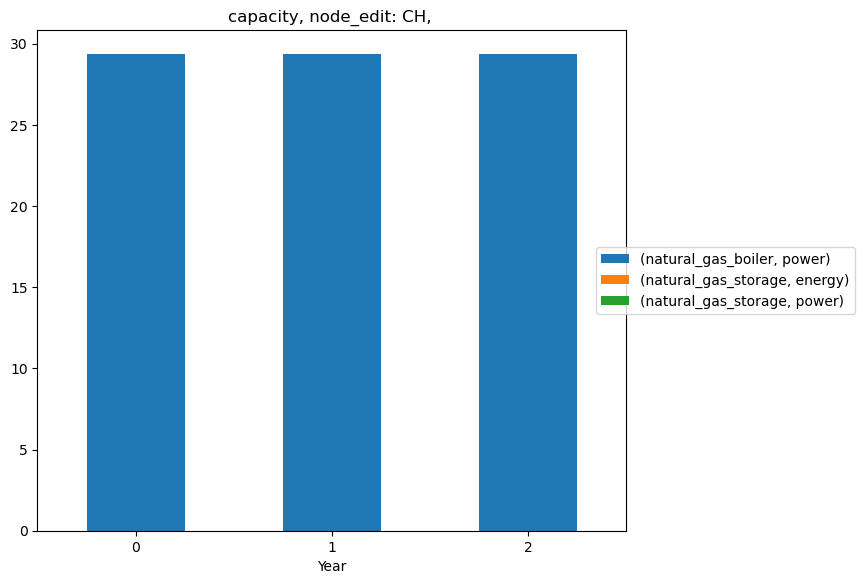

In [42]:
res_ts.plot("capacity")
#data adjustments
#plot specific technology type
res_ts.plot("capacity", tech_type="storage")
#plot charging/discharging capacities
res_ts.plot("capacity", tech_type="storage_power")
#plot all nodes separately
res_ts.plot("capacity", tech_type="conversion", node_edit="all")
#plot data of a single node
res_ts.plot("capacity", node_edit="CH")

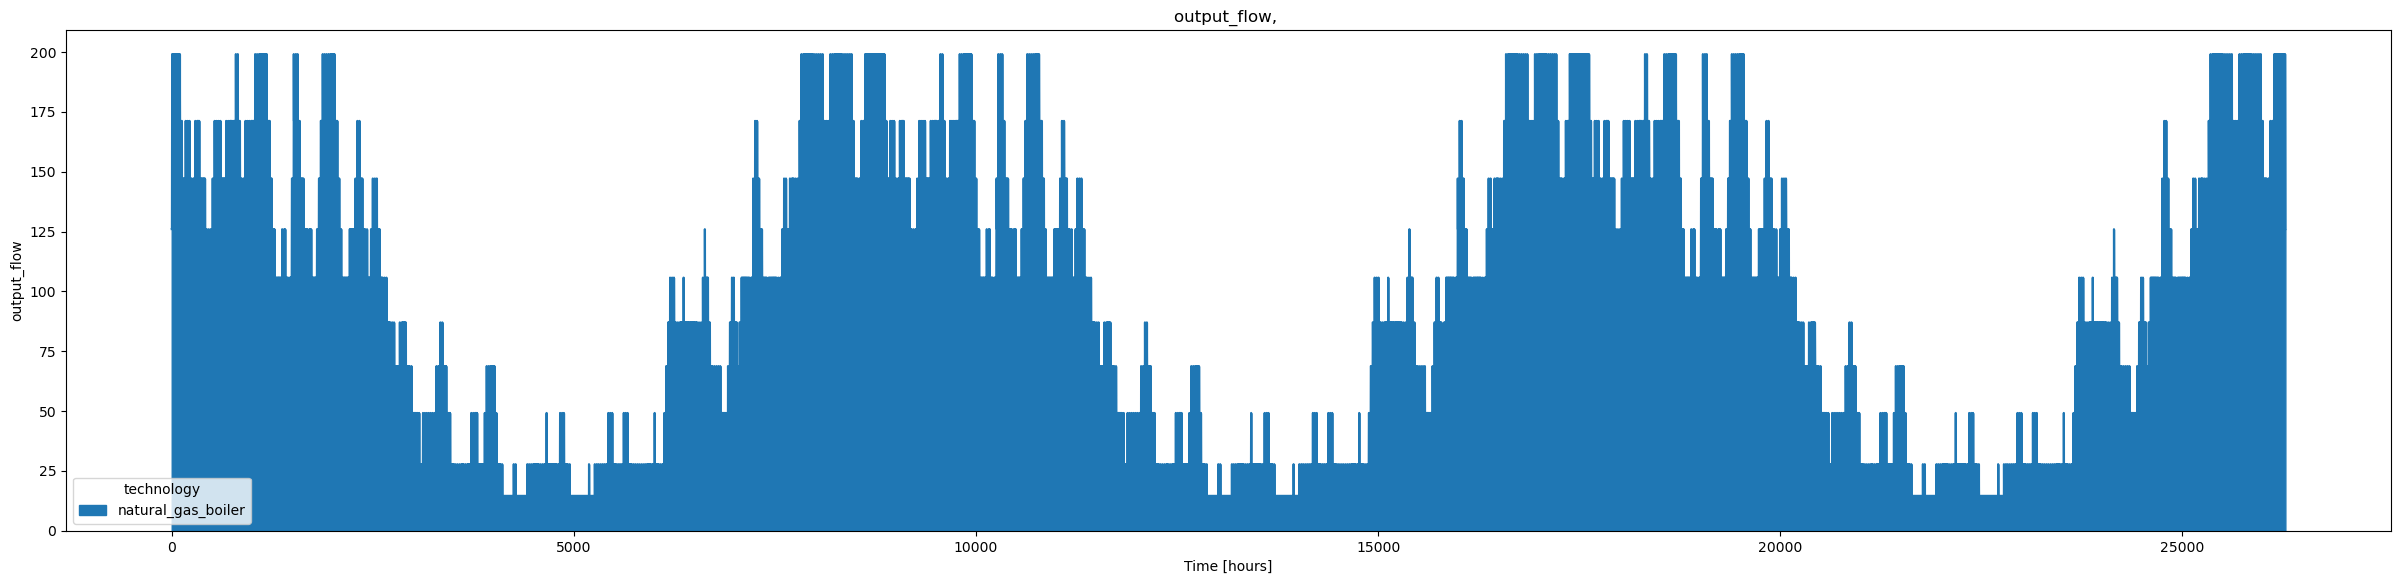

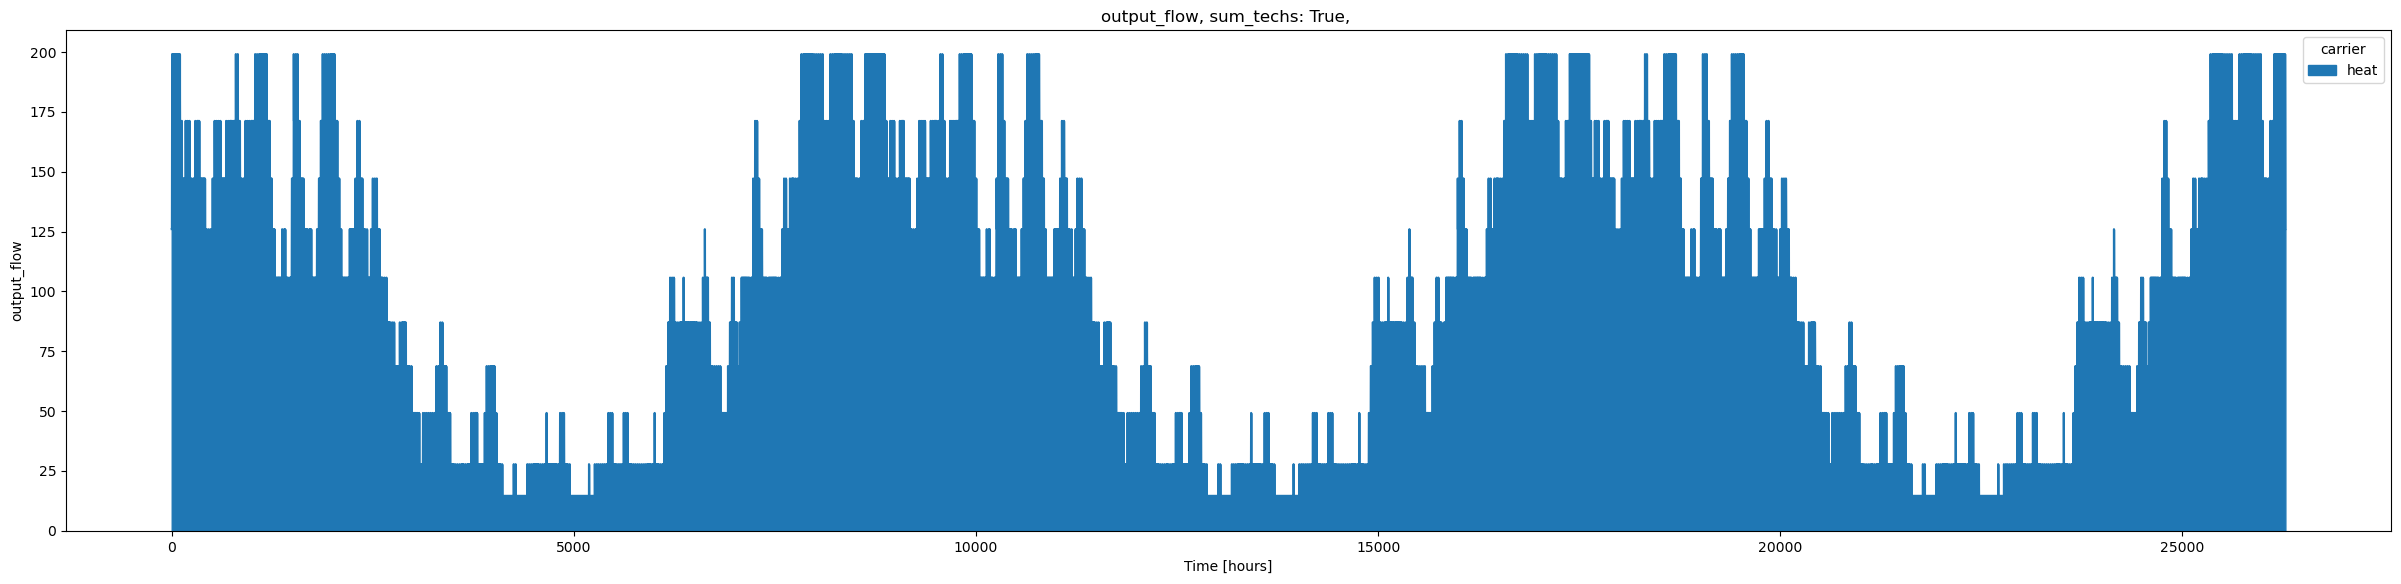

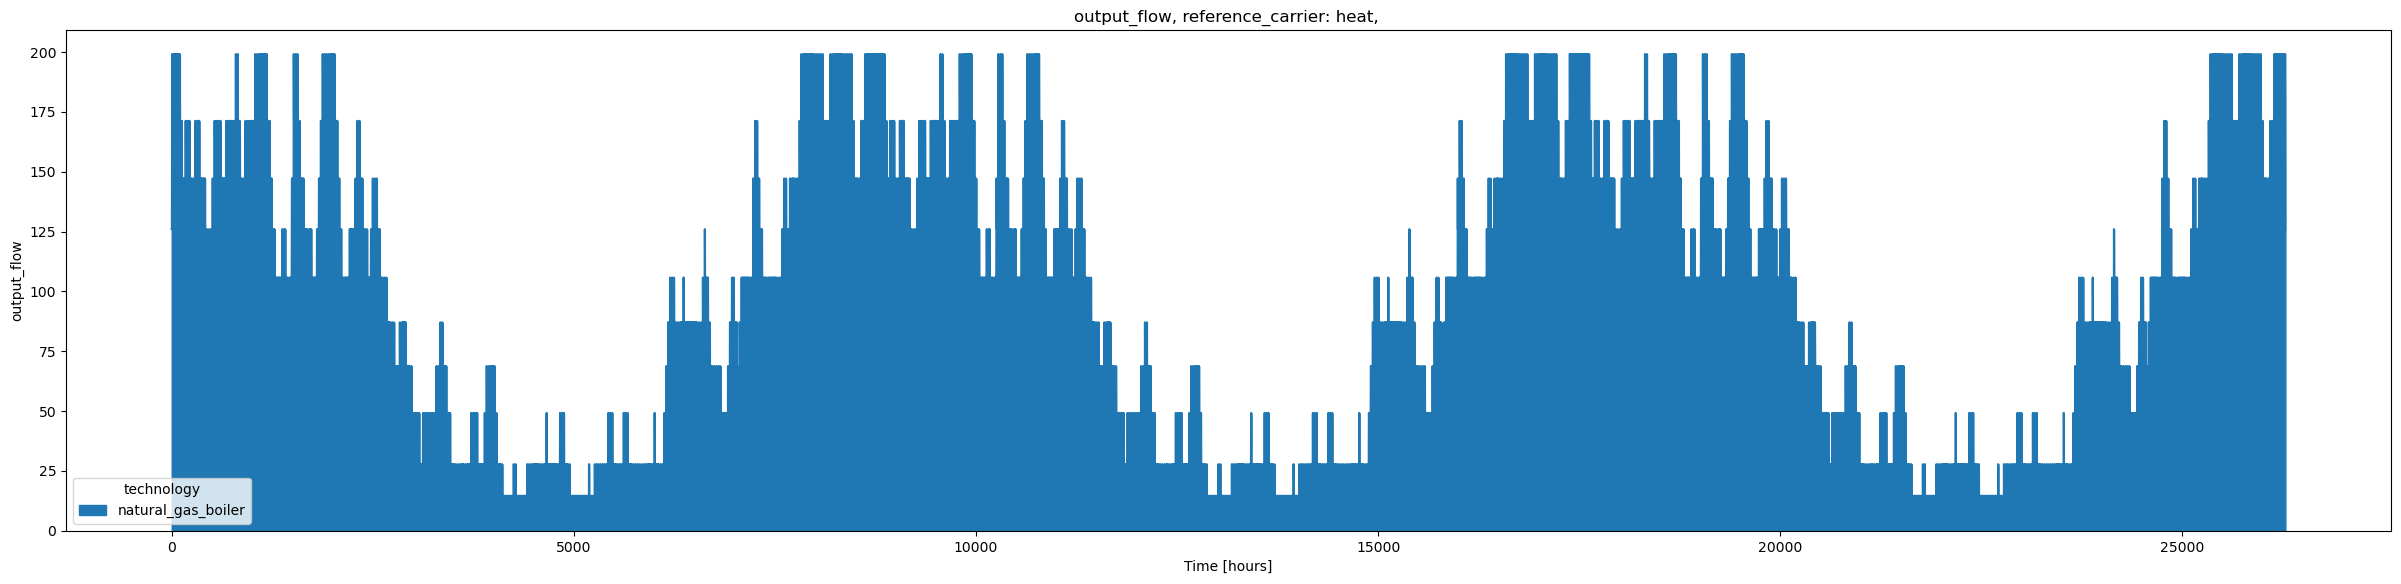

In [43]:
res_ts.plot("output_flow")
#sum technologies of identical output carrier (effect can't really be seen as there is only one tech in the dataset)
res_ts.plot("output_flow", sum_techs=True)
#extract technologies of specific reference carrier (effect can't really be seen as there is only one tech in the dataset)
res_ts.plot("output_flow", reference_carrier="heat")

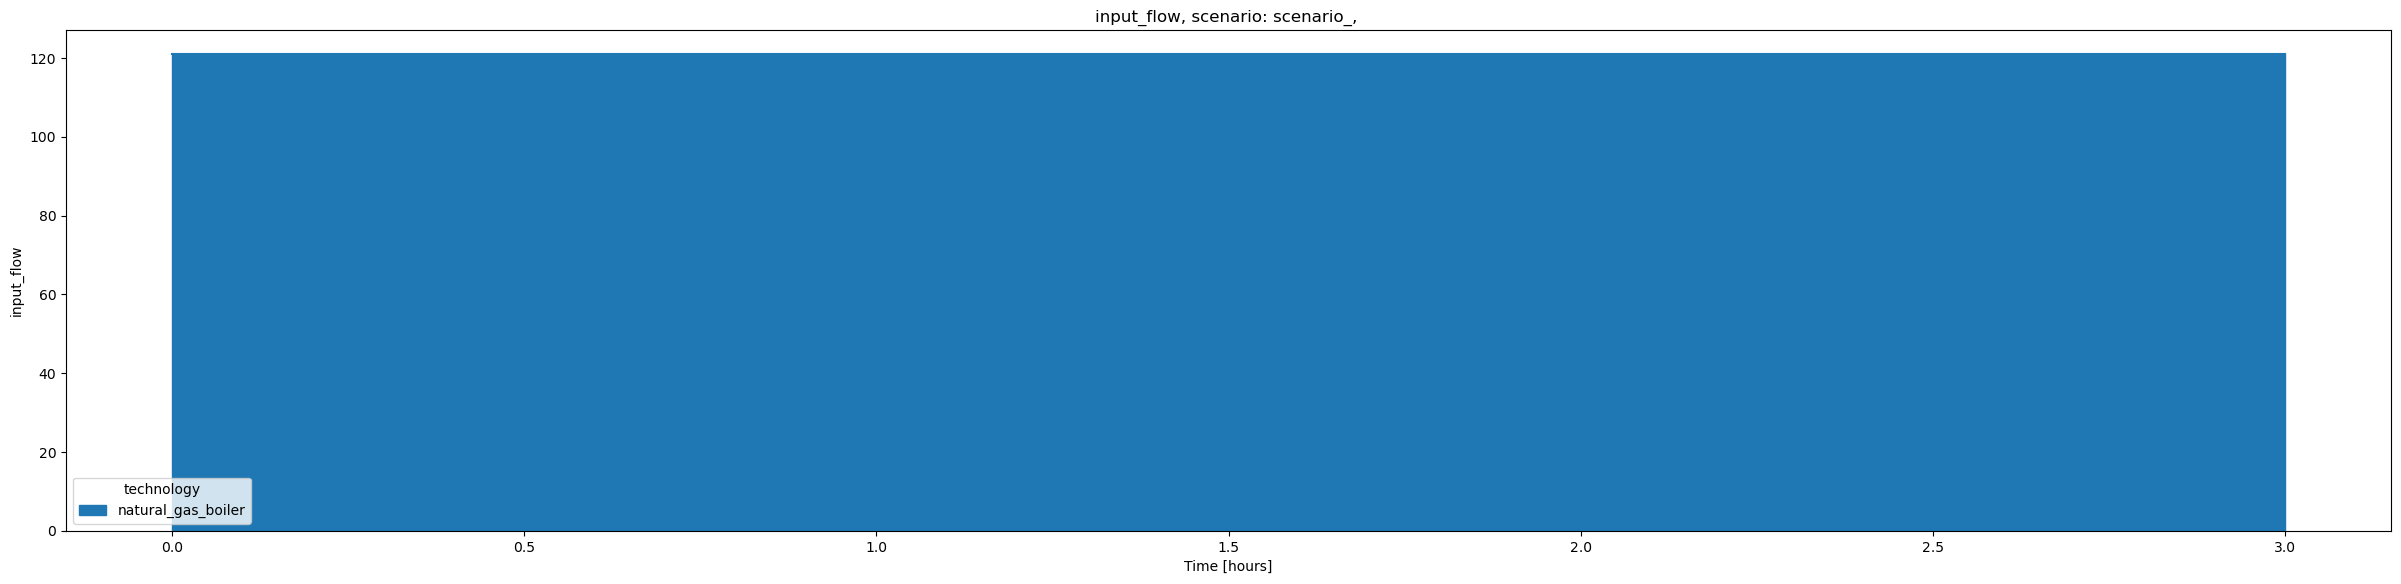

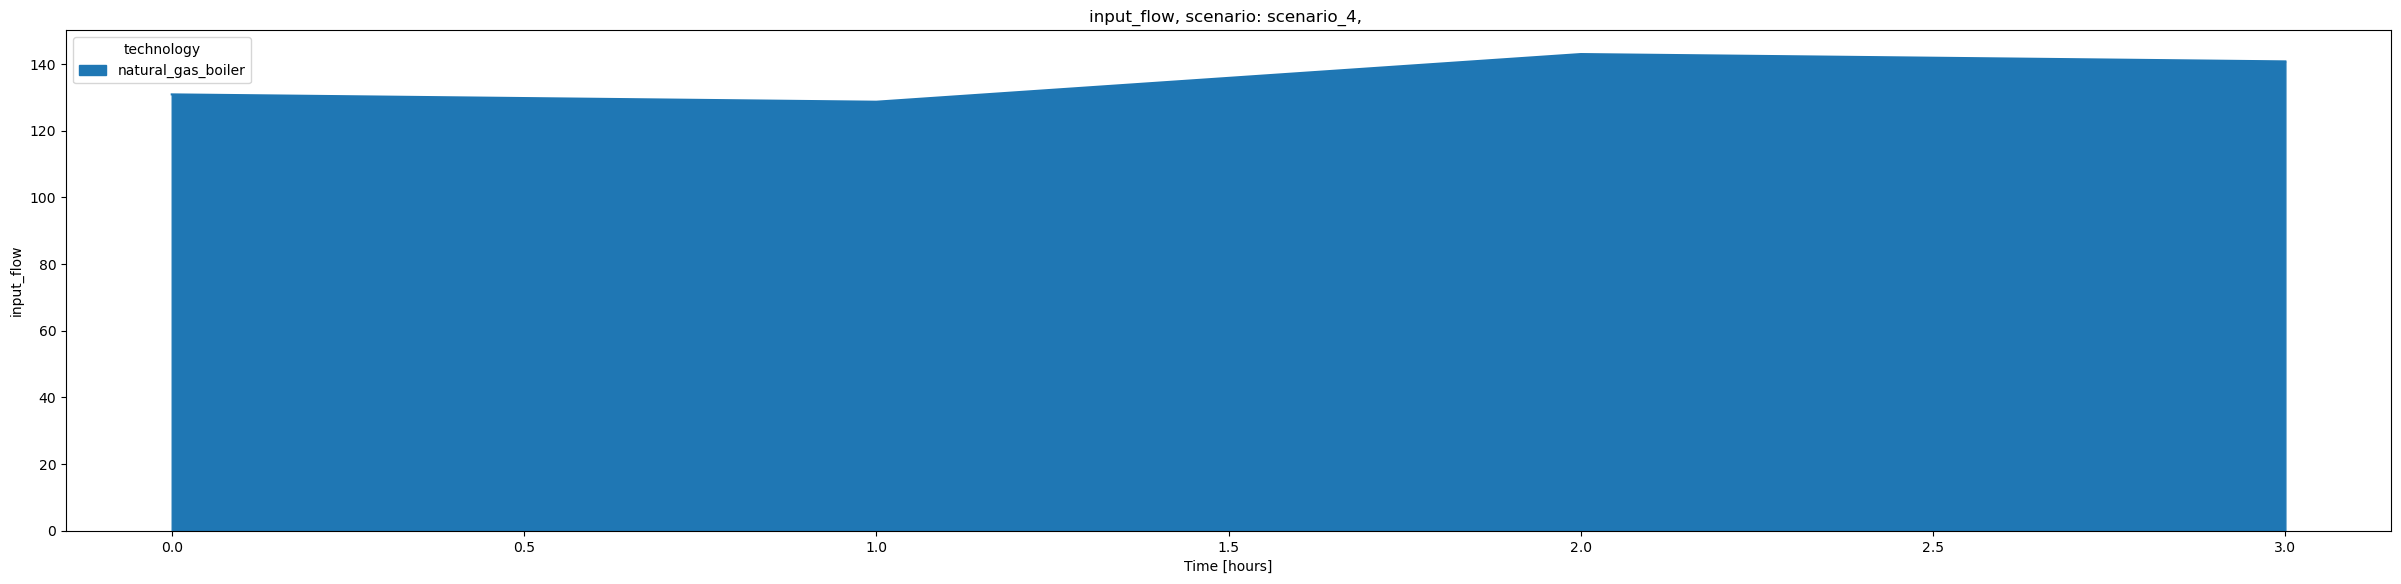

In [8]:
#create plot of multi-scenario dataset (standard scenario is plotted)
res_scenario.plot("input_flow")
#specify another scenario
res_scenario.plot("input_flow", scenario="scenario_4")